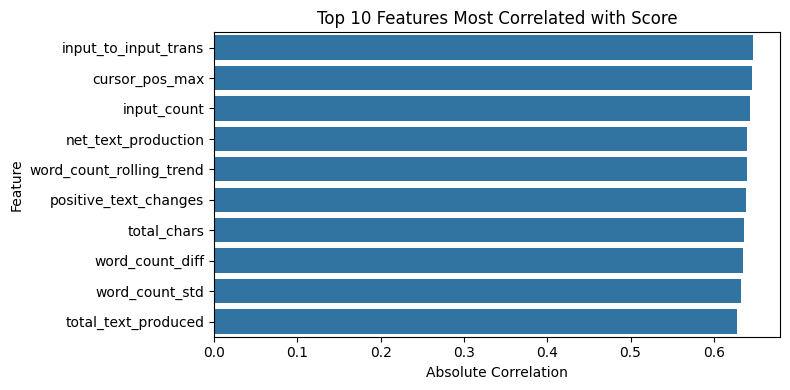

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/train_behaviour_features.csv")
scores = pd.read_csv("../data/train_scores.csv")
df = df.merge(scores, on="id", how="left")

df_num = df.select_dtypes(include=['number'])

corr = df_num.corr()['score'].drop('score')
corr_sorted = corr.abs().sort_values(ascending=False)

top = corr_sorted.head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top, y=top.index)
plt.title(f"Top {len(top)} Features Most Correlated with Score")
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../data_visualization/graph/Top_Features_Most_Correlated_with_Score.png")
plt.show()
